In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import*
%matplotlib inline 

import seaborn as sns

In [4]:
sleep = pd.read_csv('sleep.csv')

### 查看缺失值情况

In [5]:
sleep.head()

,BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest,Pred,Exp,Danger
0,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


In [6]:
sleep.isnull().sum()

BodyWgt      0
BrainWgt     0
NonD        14
Dream       12
Sleep        4
Span         4
Gest         4
Pred         0
Exp          0
Danger       0
dtype: int64

### 实现类似R中mice包的 md.patten() 的作用

In [23]:
def md_patten(data):
    """
    Display missing-data patterns. and highlight the missing values
    """
    df = data.isnull().replace({True:-1,False:0})
    df['.Row_Nums'] = 1

    df1 = df.groupby(by=list(data.columns)).agg(sum).sort_values('.Row_Nums',ascending =False).reset_index()
    df2 = data.isnull().sum().to_frame().T.rename(index = {0:' '})
    tem = pd.concat([df1,df2]).fillna('Missing_Nums')
    return tem

In [31]:
md_patten(sleep)

,.Row_Nums,BodyWgt,BrainWgt,Danger,Dream,Exp,Gest,NonD,Pred,Sleep,Span
0,42,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,-1,0,0,-1,0,0,0
2,3,0,0,0,0,0,-1,0,0,0,0
3,2,0,0,0,-1,0,0,-1,0,-1,0
4,2,0,0,0,0,0,0,-1,0,-1,0
5,2,0,0,0,0,0,0,0,0,0,-1
6,1,0,0,0,-1,0,0,-1,0,0,-1
7,1,0,0,0,0,0,-1,0,0,0,-1
,Missing_Nums,0,0,0,12,0,4,14,0,4,4


### 利用pandas style 以及 seaborn 可视化缺失值

#### 利数字标注缺失值，并绘图

In [33]:
def showHight(col):
    """
    Highlight certain values.
    """
    c = col ==-1
    #c = col ==col.max()
    return ['background-color:red' if v else ' ' for v in c]


def aggr(data,plot =True,figsize = (9,8)):
    """
    1. Display missing-data patterns. and highlight the missing values.
    2. Plot the missing values in each variable using bar plot.
    3. Plot the missing values in certain combinations of variables using aggregation plot(heatmap vi Seaborn).
    """
    df = data.isnull().replace({True:-1,False:0})
    df['.Row_Nums'] = 1

    df1 = df.groupby(by=list(data.columns)).agg(sum).sort_values('.Row_Nums',ascending =False).reset_index()
    df2 = data.isnull().sum().to_frame().T.rename(index = {0:' '})
    tem = pd.concat([df1,df2])
    if plot:
        # bar plot
        data.isnull().sum().to_frame().plot(kind ='bar',figsize = (10,9),legend = False)
        
        # aggregation plot
        plt.figure(figsize=(10,9))
        sns.heatmap(tem,vmax =0.0,cmap = 'OrRd_r',linecolor='white',linewidths=0.1, annot=True,cbar =False) 
        
    return tem.fillna('Missing_Nums').style.apply(showHight)

,.Row_Nums,BodyWgt,BrainWgt,Danger,Dream,Exp,Gest,NonD,Pred,Sleep,Span
0,42,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,-1,0,0,-1,0,0,0
2,3,0,0,0,0,0,-1,0,0,0,0
3,2,0,0,0,-1,0,0,-1,0,-1,0
4,2,0,0,0,0,0,0,-1,0,-1,0
5,2,0,0,0,0,0,0,0,0,0,-1
6,1,0,0,0,-1,0,0,-1,0,0,-1
7,1,0,0,0,0,0,-1,0,0,0,-1
,Missing_Nums,0,0,0,12,0,4,14,0,4,4


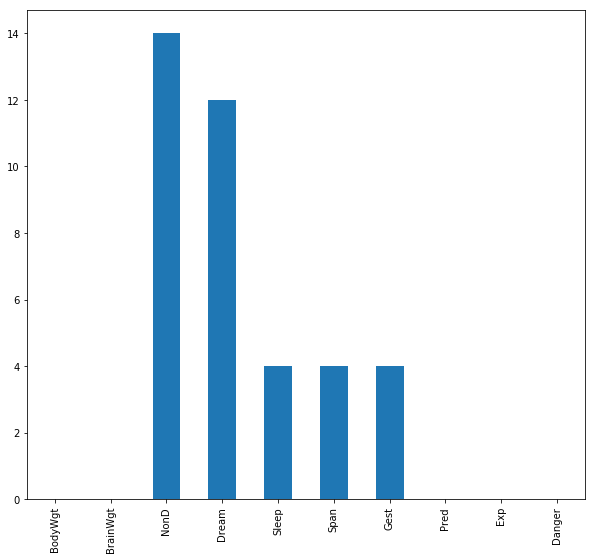

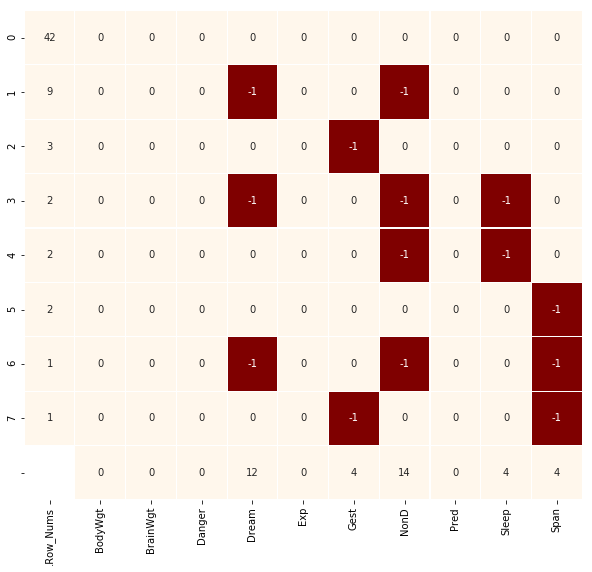

In [34]:
aggr(sleep)

#### 将缺失值用NaN 替换


In [35]:
# 给特定值上色
def showHight(col):
    c = col =='NaN'
    #c = col ==col.max()
    return ['background-color:red' if v else ' ' for v in c]


def aggr(data):
    df = data.isnull().replace({True:'NaN',False:' '})
    df['.Row_Nums'] = 1

    df1 = df.groupby(by=list(data.columns)).agg(sum).sort_values('.Row_Nums',ascending =False).reset_index()
    df2 = data.isnull().sum().to_frame().T.rename(index = {0:' '})
    tem = pd.concat([df1,df2]).fillna('Missing_Nums')
    return tem.style.apply(showHight)

In [36]:
aggr(sleep)

,.Row_Nums,BodyWgt,BrainWgt,Danger,Dream,Exp,Gest,NonD,Pred,Sleep,Span
0,42,,,,,,,,,,
1,9,,,,NaN,,,NaN,,,
2,3,,,,,,NaN,,,,
3,2,,,,,,,,,,NaN
4,2,,,,,,,NaN,,NaN,
5,2,,,,NaN,,,NaN,,NaN,
6,1,,,,,,NaN,,,,NaN
7,1,,,,NaN,,,NaN,,,NaN
,Missing_Nums,0,0,0,12,0,4,14,0,4,4
